Data shape: (1, 1, 1024, 1024)
Sliced Data shape: (1024, 1024)


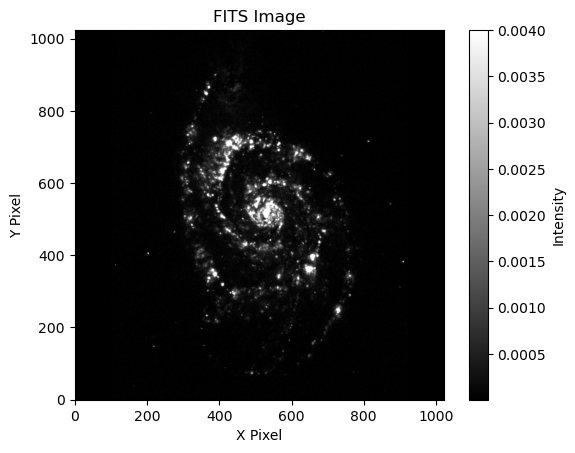

In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits

# FITS 파일 열기
hdul = fits.open(r'D:\R&E\arms\60\m51606\skymodel.fits')

# 데이터 확인
data = hdul[0].data  # 4D 데이터 (1, 1, 1024, 1024)
print("Data shape:", data.shape)

# 2D 슬라이싱 (Stokes=0, Frequency=0)
image_data = data[0, 0, :, :]  # 3, 4번째 축만 남김
print("Sliced Data shape:", image_data.shape)

# 시각화
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')  # 컬러 바 추가
plt.title('FITS Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

# FITS 파일 닫기
hdul.close()


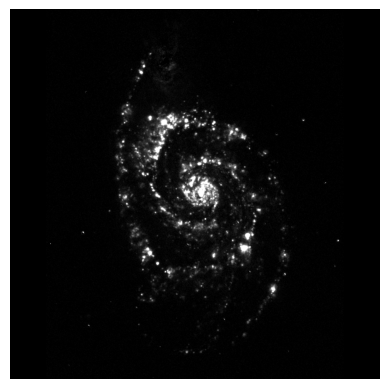

Data shape: (1024, 1024)


In [58]:
import matplotlib.pyplot as plt
from astropy.io import fits

# FITS 파일 열기
hdul = fits.open(r'D:\R&E\arms\60\M51ha.fits.txt')

# FITS 파일에서 데이터 추출
data = hdul[0].data

# FITS 파일 시각화 (축과 색상 바 없이 이미지만 출력)
plt.imshow(data, cmap='gray', origin='lower')
plt.axis('off')  # 축 숨기기

# 이미지 저장 경로 설정
save_path = r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\skymodel_mse.png"

# 이미지 저장
plt.savefig(save_path, bbox_inches='tight', pad_inches=0)

# 이미지 표시
plt.show()

# FITS 파일 닫기
hdul.close()

# 데이터의 차원 출력
print(f"Data shape: {data.shape}")


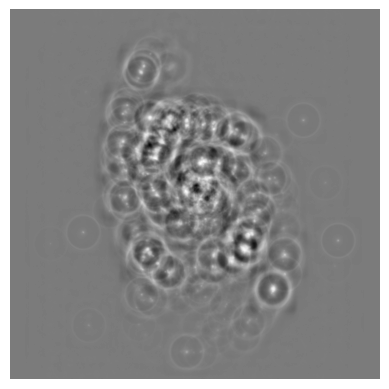

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import convolve

# 첫 번째 FITS 파일 (이미지)
hdul_1 = fits.open(r'D:\R&E\arms\60\M51ha.fits.txt')
image_data = hdul_1[0].data  # 첫 번째 FITS에서 데이터 추출

# 두 번째 FITS 파일 (4D 커널)
hdul_2 = fits.open(r'D:\R&E\arms\60\m516060\psf_image.fits')
kernel_data = hdul_2[0].data  # 두 번째 FITS에서 데이터 추출

# 4D 데이터에서 2D 커널로 변환
kernel_data_2d = np.squeeze(kernel_data)

# 첫 번째 FITS 이미지에 대해 두 번째 FITS에서 얻은 2D 커널로 컨볼루션 연산 수행
# 패딩을 추가하여 원본 이미지 크기와 동일한 출력 크기 유지
convolution_result = convolve(image_data, kernel_data_2d, mode='constant', cval=0)

# 컨볼루션 결과 시각화 (축과 색상 바 없이 이미지만 출력)
plt.imshow(convolution_result, cmap='gray', origin='lower')
plt.axis('off')  # 축 숨기기

# 이미지 저장 경로 설정
save_path = r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\60\result_mse.png"

# 이미지 저장
plt.savefig(save_path, bbox_inches='tight', pad_inches=0)

# 이미지 표시
plt.show()

# FITS 파일 닫기
hdul_1.close()
hdul_2.close()


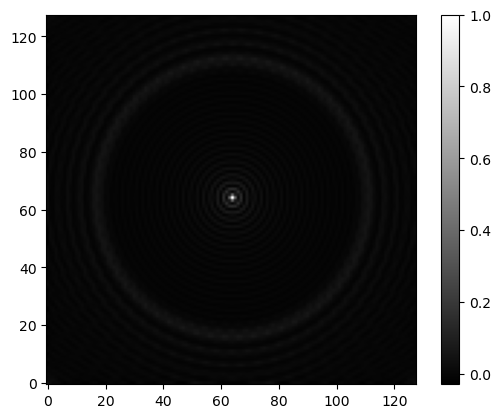

In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# FITS 파일 열기
hdul = fits.open(r'D:\R&E\arms\60\m516060\psf_image.fits')

# FITS 파일에서 데이터 추출
psf_data = hdul[0].data

# 불필요한 차원 제거 (1x1 차원 제거)
psf_data_2d = np.squeeze(psf_data)

# PSF 이미지 시각화
plt.imshow(psf_data_2d, cmap='gray', origin='lower')
plt.colorbar()  # 컬러 바 추가 (선택 사항)
plt.show()

# FITS 파일 닫기
hdul.close()


In [59]:
from PIL import Image
import numpy as np

# MSE 계산 함수
def calculate_mse(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("두 이미지의 크기가 다릅니다. 동일한 크기로 맞춰야 합니다.")
    return np.mean((image1 - image2) ** 2)

# PNG 파일 읽기 함수
def load_image_as_array(file_path):
    image = Image.open(file_path).convert('L')  # Grayscale로 변환
    return np.array(image)

# 첫 번째 PNG 파일 열기
image1_path = r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\skymodel_mse.png"
image1 = load_image_as_array(image1_path)

# 두 번째 PNG 파일 열기
image2_path = r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\3\result_mse.png"
image2 = load_image_as_array(image2_path)

# 이미지 크기 출력
print(f"Image 1 size: {image1.shape}")
print(f"Image 2 size: {image2.shape}")

# MSE 계산
try:
    mse = calculate_mse(image1, image2)
    print(f"Mean Squared Error (MSE): {mse}")
except ValueError as e:
    print(e)


Image 1 size: (369, 369)
Image 2 size: (369, 369)
Mean Squared Error (MSE): 36.75220511012698


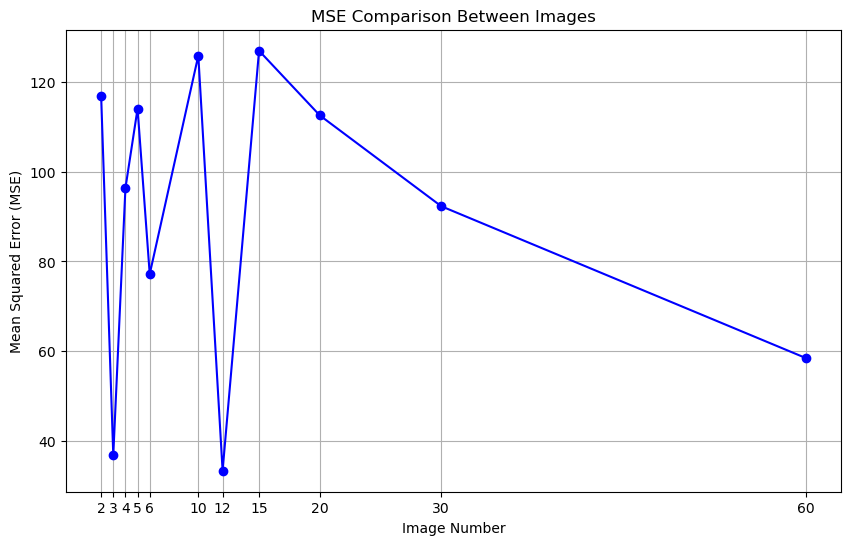

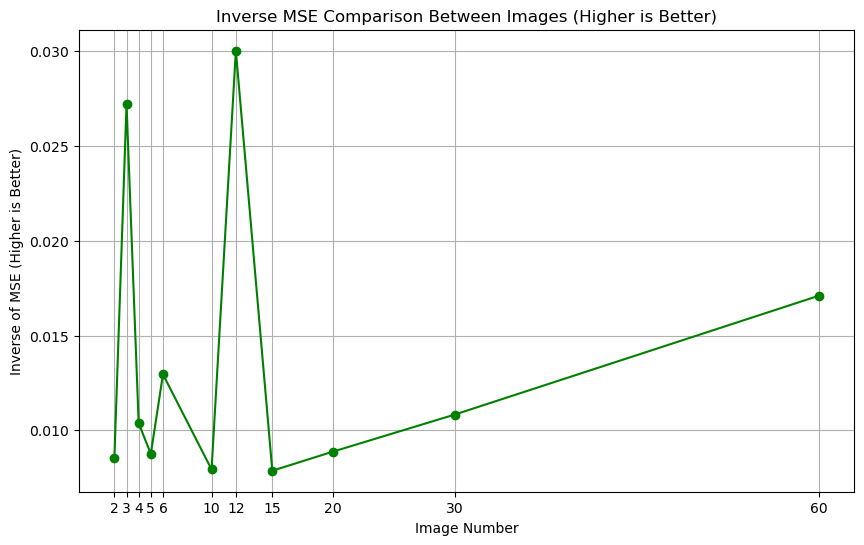

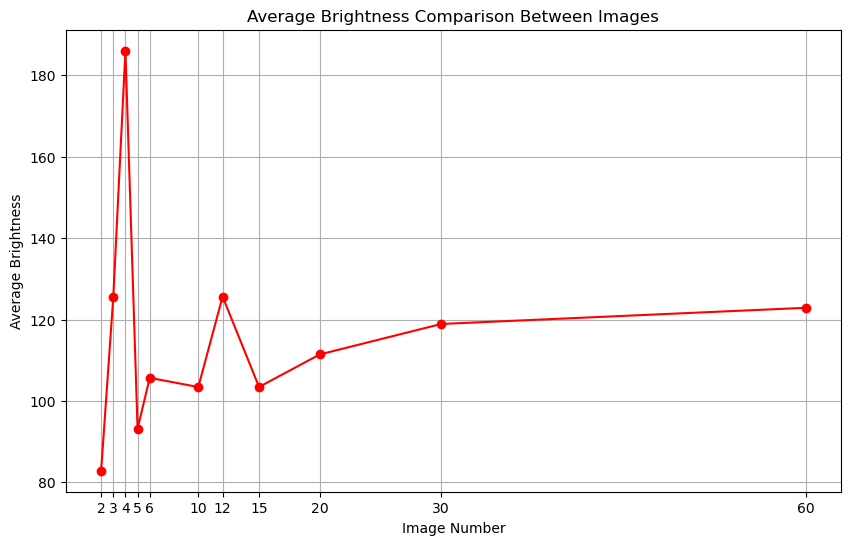

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# MSE 계산 함수
def calculate_mse(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("두 이미지의 크기가 다릅니다. 동일한 크기로 맞춰야 합니다.")
    return np.mean((image1 - image2) ** 2)

# PNG 파일 읽기 함수
def load_image_as_array(file_path):
    image = Image.open(file_path).convert('L')  # Grayscale로 변환
    return np.array(image)

# 첫 번째 이미지 파일 (기준 이미지)
image1_path = r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\skymodel_mse.png"
image1 = load_image_as_array(image1_path)

# 두 번째 이미지 파일 경로 (11개의 결과 이미지 경로)
image_paths = [
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\2\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\3\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\4\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\5\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\6\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\10\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\12\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\15\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\20\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\30\result_mse.png",
    r"C:\Users\lyg69\OneDrive\바탕 화면\2-2\창의개인연구\PSF 합성결과\60\result_mse.png"
]

# MSE 계산 및 저장
mse_values = []  # MSE 값을 저장할 리스트

for image_path in image_paths:
    image2 = load_image_as_array(image_path)
    try:
        mse = calculate_mse(image1, image2)
        mse_values.append(mse)
    except ValueError as e:
        print(f"Error comparing {image_path}: {e}")

# x축 레이블 (이미지 번호)
x_labels = [2, 3, 4, 5, 6, 10, 12, 15, 20, 30, 60]

# 그래프 1: MSE 값 그래프 (기존)
plt.figure(figsize=(10, 6))
plt.plot(x_labels, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Image Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison Between Images')
plt.xticks(x_labels)  # x축 레이블 설정
plt.grid(True)
plt.show()

# 그래프 2: MSE 값의 역수로 그래프 (MSE 값이 작을수록 높은 점수)
plt.figure(figsize=(10, 6))
plt.plot(x_labels, 1/np.array(mse_values), marker='o', linestyle='-', color='g')
plt.xlabel('Image Number')
plt.ylabel('Inverse of MSE (Higher is Better)')
plt.title('Inverse MSE Comparison Between Images (Higher is Better)')
plt.xticks(x_labels)  # x축 레이블 설정
plt.grid(True)
plt.show()

# 평균 밝기 계산 함수
def calculate_average_brightness(image):
    return np.mean(image)

# 평균 밝기 계산 및 저장
average_brightness_values = []  # 평균 밝기 값을 저장할 리스트

for image_path in image_paths:
    image = load_image_as_array(image_path)
    average_brightness = calculate_average_brightness(image)
    average_brightness_values.append(average_brightness)

# 그래프 3: 평균 밝기 비교 그래프
plt.figure(figsize=(10, 6))
plt.plot(x_labels, average_brightness_values, marker='o', linestyle='-', color='r')
plt.xlabel('Image Number')
plt.ylabel('Average Brightness')
plt.title('Average Brightness Comparison Between Images')
plt.xticks(x_labels)  # x축 레이블 설정
plt.grid(True)
plt.show()
